In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.stats import linregress
from scipy.stats import chisquare

In [2]:
r = .01005/1 #Shunt resistance
f_85 = np.array([[2.222, 2.221, 2.221, 2.222, 2.2221, 2.2192, 2.2167, 2.2159, 2.2139, 2.2136, 2.2142, 2.2171, 2.2201, 2.2203,
         2.2207, 2.2203],[4.233],[3.8427],[3.4219],[3.017],[2.6163],[1.8044],[1.4049],[1.0019],[0.6039, 0.6095],
       [0.3951]])
f_87 = np.array([[3.3308, 3.334, 3.331, 3.332, 3.3341, 3.3337, 3.3341, 3.3331, 3.3326, 3.3343],[6.343,6.348,6.372],[5.7893],
        [5.217,5.154],[4.5442],[3.9303],[2.7101],[2.109],[1.505],[0.8993],[0.5931]])
v = np.array([0.01005,0.02006,0.018,0.01601,0.014,0.01201,0.008,0.006,0.004,0.002,0.001])
I = v/r

In [3]:
I_scat_85 = np.array([[I[j] for _ in i] for j,i in enumerate(f_85)])
I_scat_85 = np.concatenate(I_scat_85)
I_scat_87 = np.array([[I[j] for _ in i] for j,i in enumerate(f_87)])
I_scat_87 = np.concatenate(I_scat_87)
f_85_cat = np.concatenate(f_85)
f_87_cat = np.concatenate(f_87)

In [4]:
np.array([np.average(f) for f in f_85])/np.array([np.average(f) for f in f_87])

array([0.66569944, 0.66615958, 0.663759  , 0.65989779, 0.66392324,
       0.66567438, 0.66580569, 0.66614509, 0.66571429, 0.67463583,
       0.66616085])

In [5]:
def lin(x,a,b):
    return b*x + a

In [43]:
std = ([np.std(f) for f in f_85][0] + [np.std(f) for f in f_85][-2])/2
std
one = 1/std**2
std

0.0028731947374244313

In [7]:
x_b = sum(I_scat_85)/(std**2)
y_b = sum(f_85_cat)/(std**2)
xy_b = sum(f_85_cat*I_scat_85)/(std**2)
x2 = sum((I_scat_85**2))/(std**2)
x_b,y_b,xy_b,x2

(3180609.0405244273, 7080429.322768155, 8063582.383600602, 3674743.6783345663)

In [8]:
b = ((1/std**2)*xy_b-x_b*y_b)/((1/std**2)*x2-x_b*x_b)
a_int = (x2*y_b-x_b*xy_b)/(x2*(1/std**2)-x_b*x_b)
b,a_int

(2.2275873678660685, -0.03842981417892729)

In [9]:
xp2 = x2 - x_b**2/(1/std**2)
sig_b = 1/np.sqrt(np.abs(xp2))
sig_a = np.sqrt(np.abs(1/(1/std**2) + ((x_b/(1/std**2))*sig_b)**2))
sig_b,sig_a

(0.0001119170482317909, 0.0041098012500430875)

In [10]:
b_1 = linregress(I_scat_85,f_85_cat)[0]
a_1 = linregress(I_scat_85,f_85_cat)[1]
err_1 = linregress(I_scat_85,f_85_cat)[-1]
b_1,a_1,err_1

(2.0252417503854505, 0.19535191416357955, 0.002557957059608245)

In [33]:
N = 135
a = .275
i = 0.00093/r
B_e = .009*N*i/a
delta_B = (.009*N/(a*r))*0.000001
B_e, delta_B

(0.40884667571234734, 0.0004396200814111261)

In [34]:
gamma = 1/(0.009*N/a)
I_1 = (2.799/(gamma*b_1) - 1)/2
dI_1 = (-2.799*err_1/2)/(gamma*(b_1**2))
I_1,dI_1

(2.5530900586898517, -0.003856168414343174)

In [13]:
b_2 = linregress(I_scat_87,f_87_cat)[0]
a_2 = linregress(I_scat_87,f_87_cat)[1]
err_2 = linregress(I_scat_87,f_87_cat)[-1]
b_2,a_2,err_2

(3.051266746079265, 0.28700085168900014, 0.008179453491306032)

In [35]:
gamma = 1/(0.009*N/a)
I_2 = ((2.799/(gamma*b_2)) - 1)/2
dI_2 = (-2.799*err_2/2)/(gamma*(b_2**2))
I_2,dI_2

(1.5264519522885482, -0.005432258427556011)

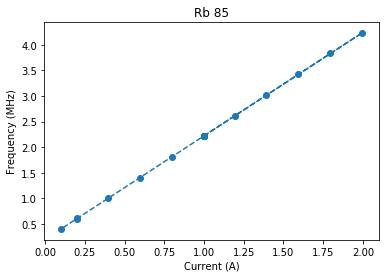

In [70]:
plt.scatter(I_scat_85, f_85_cat)
#plt.plot(I_scat_85,[lin(x,a_int,b) for x in I_scat_85],ls="--")
plt.plot(I_scat_85,[lin(x,a_1,b_1) for x in I_scat_85],ls="--")
plt.ylabel("Frequency (MHz)")
plt.xlabel("Current (A)")
plt.title("Rb 85")
plt.savefig("rb85_1.pdf")

In [77]:
chisquare(f_85_cat,[lin(x,a_1,b_1) for x in I_scat_85],ddof=1)

Power_divergenceResult(statistic=0.00046850181441535077, pvalue=1.0)

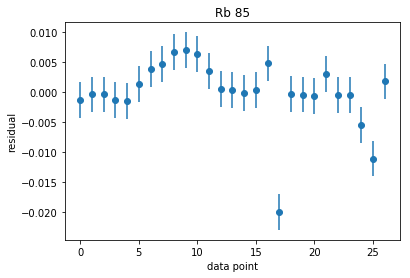

In [64]:
plt.errorbar(x=[i for i,_ in enumerate(I_scat_85)],y=[lin(x,a_1,b_1)-f_85_cat[i] for i,x in enumerate(I_scat_85)],yerr=[0.003 for _ in I_scat_85],ls="",marker="o")
plt.ylabel("residual")
plt.xlabel("data point")
plt.title("Rb 85")
plt.savefig("rb85_res_1.pdf")

In [17]:
#plt.errorbar(I,[np.average(f) for f in f_85],yerr=[np.std(f) for f in f_85],fmt=".",elinewidth=0.2,capsize=0.5)
#plt.ylabel("Frequency (MHz)")
#plt.xlabel("Current (A)")
#plt.title("Rb 85")

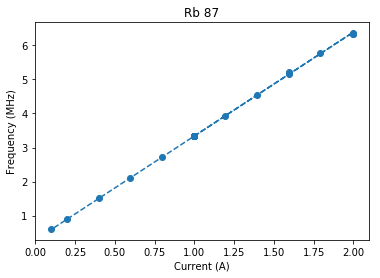

In [67]:
plt.scatter(I_scat_87, f_87_cat)
plt.plot(I_scat_87,[lin(x,a_2,b_2) for x in I_scat_87],ls="--")
plt.ylabel("Frequency (MHz)")
plt.xlabel("Current (A)")
plt.title("Rb 87")
plt.savefig("rb87_1.pdf")

In [78]:
chisquare(f_87_cat,[lin(x,a_2,b_2) for x in I_scat_87],ddof=1)

Power_divergenceResult(statistic=0.0016674121243200675, pvalue=1.0)

In [19]:
#plt.errorbar(I,[np.average(f) for f in f_87],yerr=[np.std(f) for f in f_87],fmt=".",elinewidth=0.2,capsize=0.5)
#plt.ylabel("Frequency (MHz)")
#plt.xlabel("Current (A)")
#plt.title("Rb 87")

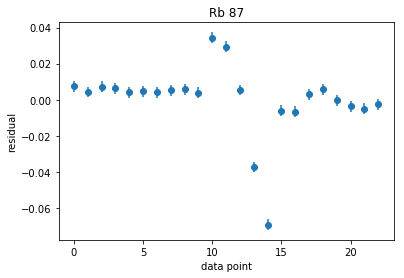

In [66]:
plt.errorbar(x=[i for i,_ in enumerate(I_scat_87)],y=[lin(x,a_2,b_2)-f_87_cat[i] for i,x in enumerate(I_scat_87)],yerr=[0.003 for _ in I_scat_87],ls="",marker="o")
plt.ylabel("residual")
plt.xlabel("data point")
plt.title("Rb 87")
plt.savefig("rb87_res_1.pdf")

# 2

The Lissijous figure appears as a projection of sweeping the magnetic field at a frequency and seeing the response of the pumping at the frequncy of the magnetic field. If the figure was lopsided, if one of the lobes was larger than the other, then we know that it is off-resonance and we have to move the frequency to make the lobes equal. This is tricky since we have to also check thee phase to make sure wee aren't viewing the figure from the wrong angle. We can come up with systematic and statistical errors by taking multiple data points for a given magnetic field and taking data points from different directions (the first addresses the statistical, the second the systematic).   

In [50]:
#opposite polarity
f_85_op = np.array([1.8362,1.4271,1.0253,0.6216,0.221])
f_87_op = [2.7502,2.1385,1.537,0.9312,0.331]
v = np.array([0.01,0.008,0.006,0.004,0.002])
I = v/r

In [51]:
ratios = np.concatenate([np.array([np.average(f) for f in f_85])/np.array([np.average(f) for f in f_87]),f_85_op/f_87_op])
np.average(ratios),np.std(ratios)

(0.6663031774133671, 0.0028603388547247923)

In [52]:
b_3 = linregress(I,f_85_op)[0]
a_3 = linregress(I,f_85_op)[1]
err_3 = linregress(I,f_85_op)[-1]
b_3,a_3,err_3

(2.02803975, -0.18453000000000008, 0.004197304023093722)

In [53]:
b_4 = linregress(I,f_87_op)[0]
a_4 = linregress(I,f_87_op)[1]
err_4 = linregress(I,f_87_op)[-1]
b_4,a_4,err_4

(3.0379642499999995, -0.27613, 0.005473868222092349)

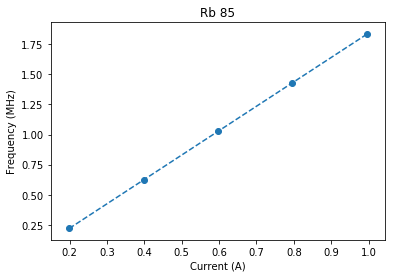

In [69]:
plt.scatter(I, f_85_op)
#plt.plot(I_scat_85,[lin(x,a,b) for x in I_scat_85],ls="--")
plt.plot(I,[lin(x,a_3,b_3) for x in I],ls="--")
plt.ylabel("Frequency (MHz)")
plt.xlabel("Current (A)")
plt.title("Rb 85")
plt.savefig("rb85_2.pdf")

In [79]:
chisquare(f_85_op,[lin(x,a_3,b_3) for x in I],ddof=1)

Power_divergenceResult(statistic=2.9240075419620864e-05, pvalue=0.9999999579483801)

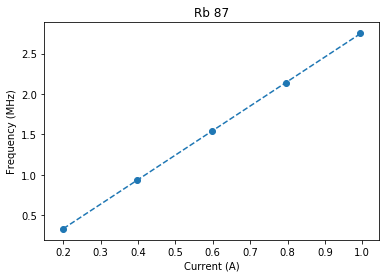

In [71]:
plt.scatter(I, f_87_op)
#plt.plot(I_scat_85,[lin(x,a,b) for x in I_scat_85],ls="--")
plt.plot(I,[lin(x,a_4,b_4) for x in I],ls="--")
plt.ylabel("Frequency (MHz)")
plt.xlabel("Current (A)")
plt.title("Rb 87")
plt.savefig("rb87_2.pdf")

In [80]:
chisquare(f_87_op,[lin(x,a_4,b_4) for x in I],ddof=1)

Power_divergenceResult(statistic=3.431208915845327e-05, pvalue=0.9999999465454006)

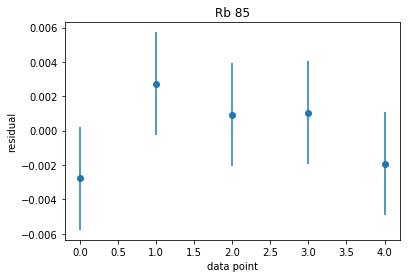

In [72]:
plt.errorbar(x=np.array([i for i,_ in enumerate(I)]),y=np.array([lin(x,a_3,b_3)-f_85_op[i] for i,x in enumerate(I)]),yerr=np.array([0.003 for _ in I]),ls="",marker="o")
plt.ylabel("residual")
plt.xlabel("data point")
plt.title("Rb 85")
plt.savefig("rb85_res_2.pdf")

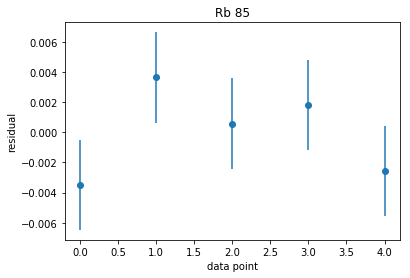

In [73]:
plt.errorbar(x=np.array([i for i,_ in enumerate(I)]),y=np.array([lin(x,a_4,b_4)-f_87_op[i] for i,x in enumerate(I)]),yerr=np.array([0.003 for _ in I]),ls="",marker="o")
plt.ylabel("residual")
plt.xlabel("data point")
plt.title("Rb 85")
plt.savefig("rb87_res_2.pdf")

In [36]:
I_3 = ((2.799/(gamma*b_3)) - 1)/2
dI_3 = (-2.799*err_3/2)/(gamma*(b_3**2))
I_3,dI_3

(2.5488778410509227, -0.006310067259857377)

In [37]:
I_4 = ((2.799/(gamma*b_4)) - 1)/2
dI_4 = (-2.799*err_4/2)/(gamma*(b_4**2))
I_4,dI_4

(1.5353252855248227, -0.003667292135532985)

In [38]:
B_1 = (2*I_1+1)*a_1/2.799
B_2 = (2*I_2+1)*a_2/2.799
B_3 = (2*I_3+1)*a_3/2.799
B_4 = (2*I_4+1)*a_4/2.799
B_1,B_2,B_3,B_4

(0.42617148058510756,
 0.41557230168892495,
 -0.40200745123910475,
 -0.4015822587295243)

In [40]:
dB_1 = 2*a_1/2.799 * dI_1 + (2*I_1+1)/2.799 * err_1
dB_2 = 2*a_2/2.799 * dI_2 + (2*I_2+1)/2.799 * err_2
dB_3 = 2*a_3/2.799 * dI_3 + (2*I_3+1)/2.799 * err_3
dB_4 = 2*a_4/2.799 * dI_4 + (2*I_4+1)/2.799 * err_4
dB_1,dB_2,dB_3,dB_4

(0.005042060298796987,
 0.010729693962706085,
 0.00997603711298737,
 0.008684352825609207)

In [42]:
zv = 0.08
zi = zv/r
f_zf = (2.799/(2*I_1+1))*(.009*N*zi/a)
df_zf = -2*(2.799/(2*I_1+1)**2)*(.009*N*zi/a)*dI_1 + (2.799/(2*I_1+1))*(.009*N/(r*a))*.000001
f_zf,df_zf

(16.121327366252345, 0.020563363832740798)

In [82]:
B_pos = (2*I_2+1)*4.233/2.799
dB_pos = np.sqrt((2*4.233*dI_2/2.799)**2 + ((2*I_2+1)*std/2.799)**2)
B_pos_i = 0.009*N*(0.02006/r)/a
dB_pos_i = (0.009*N*(1/r)/a)*0.000001
B_pos,dB_pos,B_pos_i,dB_pos_i

(9.234533918138007,
 0.013241114180186973,
 8.81877883310719,
 0.00043962008141112605)

In [83]:
B_pos = (2*I_1+1)*1.4271/2.799
dB_pos = np.sqrt((2*1.4271*dI_1/2.799)**2 + ((2*I_1+1)*std/2.799)**2)
B_pos_i = 0.009*N*(0.008/r)/a
dB_pos_i = (0.009*N*(1/r)/a)*0.000001
B_pos,dB_pos,B_pos_i,dB_pos_i

(3.1133010523446143,
 0.007399368903404505,
 3.5169606512890086,
 0.00043962008141112605)